# How Low Income can Impact Air Quality Levels

# Overview

Climate change continues to become a worldwide concern and there are specific worries about how these issues may disproportionately affect people with lower socioeconomic status. To discover more about these issues, we used average income per county in California and average air quality within those counties to see if there is a correlation. We used the method of linear regression in order to analyze their relationship. After graphing the results we saw that the models did not have a significant p-value, which led us to reject the null hypothesis and make the conclusion that there is no relationship between the median AQI & income in California.

# Names

- Cristian Jarquin
- Vanessa Komar 
- Ivan Cervantes Palomino
- Bridget Phimmasone
- Sierra Rose

<a id='research_question'></a>
# Research Question

##### What is the relationship between the air quality and the median household incomes across California?

<a id='background'></a>

## Background & Prior Work

We know that climate change is a tough topic that politicians and pseudo scientists have been arguing against for decades and has gained crowds of activists all over the world. 

Climate change poses health risks and financial risks especially for low income families due to high risk of natural disasters, pollution, lack of knowledge on climate change and its effects, lack of resources, reliable infrastructure and proper maintenance, and lack of health, homeowners, or renters insurance.

An example of how climate change can create disparities for low income are the extremely hot summers that are increasing in temperature every year. People might not have the financial stability to buy luxury items like A/C and it forces people to live in rough hot conditions. Another example is the lack of green spaces, which has been known to create less respect and care for the environment from residents. Not only that, but the lack of green spaces in communities allow the air quality to worsen over time. The lack of knowledge on climate change supports a completely different lifestyle for these people because they don't know that certain acts and events create an even more polluted environment, making it worse and worse for the ozone in these communities, which explains the hotter temperatures, worse weather conditions and poor air quality.

A few of our groupmates have taken classes that spoke on similar topics regarding climate change. Our prior class work relates to our project because we gained knowledge on information related to our question in regards to climate change. However none of our previous projects have asked a similar question to ours.

According to the American Lung Association and a study on how Low-income neighborhoods disproportionately feel environmental burdens, air quality may have a bigger negative impact on lower income communities. So, not only may areas with lower income have worse air quality, but this bad air quality may disproportionately affect their daily lives. These communities don’t have the necessary funding or support for systems such as urban greening that could help with bad air quality.

References (include links):
- 1) https://www.lung.org/clean-air/outdoors/who-is-at-risk/disparities
- 2) https://www.smartcitiesdive.com/news/study-low-income-neighborhoods-disproportionately-feel-environmental-burde/543498/


# Hypothesis


##### We hypothesize that climate change disproportionately impacts the air quality in which these low-income families reside throughout California.


# Dataset(s)

For our data, we seeked out datasets in which we could extract median household income and air quality from counties in California. In order to get the air quality of each county, we are using the AQI (air quality index) as a measurement recorded by the EPA (United States Environmental Agency). We decided to store the AQI and the income of each county as float values, and the county name as a string. In order to eliminate potential confounds particular to a specific year, we collected the average income from 2015-2019 and calculated the average AQI value of each county from 2010-2020. 

Dataset 1: Air Quality Index Report
- Link to Dataset: https://www.epa.gov/outdoor-air-quality-data/air-quality-index-report
- Number of Observations: 53-54
- This dataset gives us the air quality index report for a selected year within a selected region. We will be using/combining datasets from 11 different years (2010-2020) containing data on the AQI of each county in California. 


Dataset 2: Median Household Income by County
- Link to Dataset: https://www.census.gov/search-results.html?q=california+income+by+county&page=1&stateGeo=none&searchtype=web&cssp=SERP&_charset_=UTF-8
- Number of Observations: 58
- This dataset provides the median household income for each county in California. It includes income data from 2015-2019.

We extracted the number of good/moderate/unhealthy for sensitive groups/unhealthy/very unhealthy days/AQI max/AQI 90th Percentile/AQI Median for each county in California for the 11 different years (2010-2020). We needed to get rid of the 5 counties from dataset 2 that dataset 1 did not have, and this left us with 53 total observations/counties. From dataset 2, we got the average income to classify each county. From here we want to look at the trends within the different levels of income.

Dataset 3: California County Boundaries 2016
- Link to Dataset: https://data.ca.gov/dataset/ca-geographic-boundaries 
- Number of Observations: 58 
- This dataset provides the geographical locations and boundaries for each county in California. It includes data from 2016.


# Setup

First, we need to import the appropriate libraries for our data and analysis. 

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pylab as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm

#geopandas
import geopandas as gdp
%matplotlib inline 

Next we need to import the 11 datasets containing the AQI report of each county in California over the last 11 years. 

In [2]:
# import dataset 1 for the years 2010-2020
aqi_2010 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2010.csv')
aqi_2011 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2011.csv')
aqi_2012 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2012.csv')
aqi_2013 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2013.csv')
aqi_2014 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2014.csv')
aqi_2015 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2015.csv')
aqi_2016 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2016.csv')
aqi_2017 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2017.csv')
aqi_2018 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2018.csv')
aqi_2019 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2019.csv')
aqi_2020 = pd.read_csv('/Users/sierrarose/Documents/CSVs/aqireport2020.csv')

# example of what these datasets should look like
print(aqi_2020.shape)
aqi_2020.head()

(53, 17)


,County Code,County,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
0,6001,"Alameda County, CA",366,236,110,8,11,1,218,79.0,43.0,.,9,152,.,205,.
1,6005,"Amador County, CA",359,327,29,2,1,.,156,50.0,37.0,.,.,359,.,.,.
2,6007,"Butte County, CA",366,183,144,18,18,3,379,110.0,50.5,.,.,195,.,166,5
3,6009,"Calaveras County, CA",364,260,81,10,13,.,192,77.0,44.0,.,.,232,.,127,5
4,6011,"Colusa County, CA",366,247,87,9,23,.,198,86.0,38.0,.,.,183,.,150,33


We also need to import the dataset containing the median income of each county in California between 2015-2019.

In [3]:
#import dataset 2
income = pd.read_csv('https://raw.githubusercontent.com/J-Cristian/Climate-Income-GroupProject/main/Median%20Household%20Income%20by%20County.csv')
print(income.shape)
income.head()

(60, 3)


,Median Household Income by County,Unnamed: 1,Unnamed: 2
0,County,Income,Margin Of Error
1,Alameda County,"$99,406",+/- $921
2,Alpine County,"$63,750","+/- $17,778"
3,Amador County,"$62,772","+/- $2,756"
4,Butte County,"$52,537","+/- $1,618"


Finally, we need to import the geopandas dataset for our map data visualizations of the counties in California.

<AxesSubplot:>

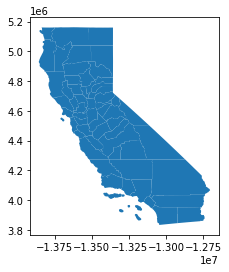

In [4]:
path = r"/Users/sierrarose/Downloads/CA_Counties/CA_Counties_TIGER2016.shp"
shp = gdp.read_file(path)
shp.plot()

# Data Cleaning

For the Income dataset we deleted the first row and renamed our columns. We also got rid of the last row since it doesn’t hold any information on for the counties in California. The shape of the dataset is now  (57,3). Then, we changed the string values of the income and margin of error to float values. We also had to drop five counties (Alpine County, Lassen County, Modoc County, Sierra County, and Yuba County) because there was no data available for them in the air quality dataset. In the air quality dataset, we replaced all columns containing a “.” with a “0.” and we dropped “, CA” from the “County” column so that just the name of the county would be displayed and not the redundant information which would also keep the naming convention consistent between our two datasets. We also added a “Year” column for each of the datasets in order to distinguish the data across all years and got rid of the latter 6 columns because they were not relevant towards our research question.

### Cleaning the Income Dataset

We removed the first row of the income dataset, because it was actually the column names. We also removed the last row because it included the source of the data and not actual data. Then we renamed the columns appropriately.

In [4]:
income = income.iloc[1: , :]
income = income.iloc[:-1 , :]
income.columns = ['County', 'Income','Margin of Error']

# look at dataset with new column names
print(income.shape)
income.head()

(58, 3)


,County,Income,Margin of Error
1,Alameda County,"$99,406",+/- $921
2,Alpine County,"$63,750","+/- $17,778"
3,Amador County,"$62,772","+/- $2,756"
4,Butte County,"$52,537","+/- $1,618"
5,Calaveras County,"$63,158","+/- $4,128"


We then changed the money values in the income column and the margin of error column from dollars to float values to make future analysis easier.

In [5]:
def money(number):
    number = number.strip('$')
    number = number.replace(',','')
    number = float(number)
    return number
def error(number):
    number = number.strip('+/- $')
    number = number.replace(',','')
    number = float(number)
    return number

income['Income'] = income['Income'].apply(money)
income['Margin of Error'] = income['Margin of Error'].apply(error)

# Income after these changes 
print(income.shape)
income.head()

(58, 3)


,County,Income,Margin of Error
1,Alameda County,99406.0,921.0
2,Alpine County,63750.0,17778.0
3,Amador County,62772.0,2756.0
4,Butte County,52537.0,1618.0
5,Calaveras County,63158.0,4128.0


Because of these changes, we needed to reset the indices of the income dataset.

In [6]:
income = income.reset_index(drop=True)

# income with fixed indices
print(income.shape)
income.head()

(58, 3)


,County,Income,Margin of Error
0,Alameda County,99406.0,921.0
1,Alpine County,63750.0,17778.0
2,Amador County,62772.0,2756.0
3,Butte County,52537.0,1618.0
4,Calaveras County,63158.0,4128.0


Finally, we dropped 5 counties that were missing from the AQI dataset so that the data was consistent between the datasets.

In [7]:
##drop 5 counties
income = income.drop(income.index[[1,17,24,45,57]])
income = income.reset_index(drop=True)

# look at final cleaned income dataset
print(income.shape)
income.head()

(53, 3)


,County,Income,Margin of Error
0,Alameda County,99406.0,921.0
1,Amador County,62772.0,2756.0
2,Butte County,52537.0,1618.0
3,Calaveras County,63158.0,4128.0
4,Colusa County,59401.0,4265.0


### Cleaning the AQI Dataset

First we extracted the columns that we will be using for each year.

In [8]:
aqi_2010 = aqi_2010[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2011 = aqi_2011[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2012 = aqi_2012[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2013 = aqi_2013[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2014 = aqi_2014[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2015 = aqi_2015[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2016 = aqi_2016[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2017 = aqi_2017[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2018 = aqi_2018[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2019 = aqi_2019[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]
aqi_2020 = aqi_2020[['County','# Days with AQI','Good','Moderate','Unhealthy','AQI Median']]

# what each dataset should look like now
print(aqi_2020.shape)
aqi_2020.head()

(53, 6)


,County,# Days with AQI,Good,Moderate,Unhealthy,AQI Median
0,"Alameda County, CA",366,236,110,11,43.0
1,"Amador County, CA",359,327,29,1,37.0
2,"Butte County, CA",366,183,144,18,50.5
3,"Calaveras County, CA",364,260,81,13,44.0
4,"Colusa County, CA",366,247,87,23,38.0


Then, we added a column providing the year for when we combine the datasets.

In [9]:
aqi_2010['Year'] = 2010
aqi_2011['Year'] = 2011
aqi_2012['Year'] = 2012
aqi_2013['Year'] = 2013
aqi_2014['Year'] = 2014
aqi_2015['Year'] = 2015
aqi_2016['Year'] = 2016
aqi_2017['Year'] = 2017
aqi_2018['Year'] = 2018
aqi_2019['Year'] = 2019
aqi_2020['Year'] = 2020

# what each dataset should look like now
print(aqi_2020.shape)
aqi_2020.head()

(53, 7)


,County,# Days with AQI,Good,Moderate,Unhealthy,AQI Median,Year
0,"Alameda County, CA",366,236,110,11,43.0,2020
1,"Amador County, CA",359,327,29,1,37.0,2020
2,"Butte County, CA",366,183,144,18,50.5,2020
3,"Calaveras County, CA",364,260,81,13,44.0,2020
4,"Colusa County, CA",366,247,87,23,38.0,2020


We found that some of the datasets were missing Alpine County, so we ommitted it completely.

In [10]:
aqi_2011 = aqi_2011.drop(aqi_2011.index[1])
aqi_2012 = aqi_2012.drop(aqi_2012.index[1])
aqi_2013 = aqi_2013.drop(aqi_2013.index[1])
aqi_2014 = aqi_2014.drop(aqi_2014.index[1])
aqi_2015 = aqi_2015.drop(aqi_2015.index[1])
aqi_2016 = aqi_2016.drop(aqi_2016.index[1])

# what each dataset should look like now
print(aqi_2011.shape)
aqi_2011.head()

(53, 7)


,County,# Days with AQI,Good,Moderate,Unhealthy,AQI Median,Year
0,"Alameda County, CA",365,220,134,.,44.0,2011
2,"Amador County, CA",363,284,76,.,38.0,2011
3,"Butte County, CA",365,149,192,.,55.0,2011
4,"Calaveras County, CA",364,216,137,.,46.0,2011
5,"Colusa County, CA",365,260,103,.,43.0,2011


We then combined all 11 years into one dataset by stacking them. We also had to reset the indices again. 

In [11]:
aqi_data = pd.concat([aqi_2010, aqi_2011], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2012], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2013], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2014], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2015], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2016], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2017], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2018], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2019], axis=0)
aqi_data = pd.concat([aqi_data, aqi_2020], axis=0)

aqi_data = aqi_data.reset_index(drop=True)

# what the new large dataset looks like
print(aqi_data.shape)
aqi_data.head()

(583, 7)


,County,# Days with AQI,Good,Moderate,Unhealthy,AQI Median,Year
0,"Alameda County, CA",365,245,115,1,43.0,2010
1,"Amador County, CA",361,302,48,1,35.0,2010
2,"Butte County, CA",365,208,144,.,47.0,2010
3,"Calaveras County, CA",365,271,81,1,41.0,2010
4,"Colusa County, CA",353,322,30,.,38.0,2010


We also replaced the periods that were representing no days with zeros and removed the state from the county names.

In [12]:
aqi_data = aqi_data.replace('.',0)

def counties(name):
    name = name.rstrip(', CA')
    return name

aqi_data['County'] = aqi_data['County'].apply(counties)

# what the new large dataset looks like
print(aqi_data.shape)
aqi_data.head()

(583, 7)


,County,# Days with AQI,Good,Moderate,Unhealthy,AQI Median,Year
0,Alameda County,365,245,115,1,43.0,2010
1,Amador County,361,302,48,1,35.0,2010
2,Butte County,365,208,144,0,47.0,2010
3,Calaveras County,365,271,81,1,41.0,2010
4,Colusa County,353,322,30,0,38.0,2010


Finally, we converted the rest of the columns to a numeric type. 

In [23]:
print(aqi_data.dtypes)
aqi_data['Unhealthy'] = pd.to_numeric(aqi_data['Unhealthy'])
aqi_data['Moderate'] = pd.to_numeric(aqi_data['Moderate'])
print(aqi_data.dtypes)

County              object
# Days with AQI      int64
Good                 int64
Moderate             int64
Unhealthy            int64
AQI Median         float64
Year                 int64
dtype: object
County              object
# Days with AQI      int64
Good                 int64
Moderate             int64
Unhealthy            int64
AQI Median         float64
Year                 int64
dtype: object


# Data Analysis & Results

### Classify income as low or medium/high

To classify a county as low income, we used the definition from the CA census that states that “Low-Income Families are defined as families whose incomes do not exceed 80 percent of the median family income.” We used $75,235 as CA’s median income from https://www.census.gov/quickfacts/fact/table/CA/INC110219. 

We then calculated 80 percent of this, and compared the income of each county. This is the value to determine if it would be considered low income.

In [14]:
#California median income
medianCA_income = 75235

#max to be considered low income
max_lowIncome = 0.8 * 75235

print(max_lowIncome)

60188.0


The minimum theshold to be consided median-high income is $60,188.01. Anything below this is considered low income, according to our definition.

In [15]:
income['Low Income'] = np.where(income['Income'] < max_lowIncome, True, False)
income.head()

,County,Income,Margin of Error,Low Income
0,Alameda County,99406.0,921.0,False
1,Amador County,62772.0,2756.0,False
2,Butte County,52537.0,1618.0,True
3,Calaveras County,63158.0,4128.0,False
4,Colusa County,59401.0,4265.0,True


In [16]:
income.describe()

,Income,Margin of Error
count,53.000000,53.000000
mean,68897.698113,2205.207547
std,20681.386568,1408.397376
min,40846.000000,347.000000
25%,53672.000000,1157.000000
50%,63158.000000,1761.000000
75%,81472.000000,2854.000000
max,124055.000000,6457.000000


In [17]:
income['Low Income'].value_counts()

False    30
True     23
Name: Low Income, dtype: int64

According to our definition of low income, 43.4% (23/53) of the California counties included in this dataset are classified as counties in which the median income is considered to be low income.

### Air Quality of Each County in California

In order to get the average AQI level, the average number of days with a good AQI level, the average number of days with a moderate AQI level, and the average number of days with an unhealthy AQI level, we found the mean of each of these values over the 11 years for each county.

In [26]:
countyGrouped = aqi_data.groupby("County")
aqiMedian_by_county = countyGrouped['AQI Median'].mean().to_frame(name = 'Overall_AQI_Median').reset_index()
aqiGood_by_county = countyGrouped['Good'].mean().to_frame(name = 'Overall_Good').reset_index()
aqiUnhealthy_by_county = countyGrouped['Unhealthy'].mean().to_frame(name = 'Overall_Unhealthy').reset_index()
aqiModerate_by_county = countyGrouped['Moderate'].mean().to_frame(name = 'Overall_Moderate').reset_index()
aqi_by_county = pd.merge(aqiMedian_by_county, aqiGood_by_county)
aqi_by_county = pd.merge(aqi_by_county, aqiUnhealthy_by_county)
aqi_by_county = pd.merge(aqi_by_county, aqiModerate_by_county)
#aqi_by_county['Overall_Bad'] = 365 - aqi_by_county['Overall_Good'] 
aqi_by_county.head()

,County,Overall_AQI_Median,Overall_Good,Overall_Unhealthy,Overall_Moderate
0,Alameda County,45.000000,225.000000,2.636364,129.000000
1,Amador County,38.636364,291.636364,0.272727,63.545455
2,Butte County,52.045455,172.454545,4.000000,172.090909
3,Calaveras County,45.318182,236.090909,2.272727,113.727273
4,Colusa County,42.090909,257.000000,4.181818,99.272727


Now we can combine the income with the above data for each county.

In [27]:
all_data = pd.merge(income, aqi_by_county)
all_data.head()

,County,Income,Margin of Error,Low Income,Overall_AQI_Median,Overall_Good,Overall_Unhealthy,Overall_Moderate
0,Alameda County,99406.0,921.0,False,45.000000,225.000000,2.636364,129.000000
1,Amador County,62772.0,2756.0,False,38.636364,291.636364,0.272727,63.545455
2,Butte County,52537.0,1618.0,True,52.045455,172.454545,4.000000,172.090909
3,Calaveras County,63158.0,4128.0,False,45.318182,236.090909,2.272727,113.727273
4,Colusa County,59401.0,4265.0,True,42.090909,257.000000,4.181818,99.272727


We used pd.describe() to look at the mean across all the counties for each of these columns. From this description we can see that days with a good AQI level are a lot more common than days with a moderate AQI level, and even more common than days with an unhealthy AQI level.

In [29]:
all_data.describe()

,Income,Margin of Error,Overall_AQI_Median,Overall_Good,Overall_Unhealthy,Overall_Moderate
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,68897.698113,2205.207547,47.955403,210.317324,6.600343,114.907376
std,20681.386568,1408.397376,15.308269,84.822108,10.498802,58.632559
min,40846.000000,347.000000,17.454545,35.000000,0.272727,9.636364
25%,53672.000000,1157.000000,37.727273,149.181818,1.636364,66.545455
50%,63158.000000,1761.000000,44.545455,232.272727,2.636364,110.454545
75%,81472.000000,2854.000000,52.272727,280.181818,4.909091,165.636364
max,124055.000000,6457.000000,87.272727,349.818182,50.727273,251.727273


### Geographical Representation of AQI and Income Data

In [22]:
shp = shp.rename(columns={'NAMELSAD': 'County'})
df = shp.merge(all_data, on="County", how="right")
gdf = gdp.GeoDataFrame(df)
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,LSAD,CLASSFP,MTFCC,CSAFP,...,INTPTLAT,INTPTLON,geometry,Income,Margin of Error,Low Income,Overall_AQI_Median,Overall_Good,Overall_Unhealthy,Overall_Moderate
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,...,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",99406.0,921.0,False,45.000000,225.000000,2.636364,129.000000
1,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,...,+38.4435501,-120.6538563,"POLYGON ((-13472697.863 4647652.232, -13472697...",62772.0,2756.0,False,38.636364,291.636364,0.272727,63.545455
2,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,...,+39.6659588,-121.6019188,"POLYGON ((-13565004.793 4798394.124, -13564991...",52537.0,1618.0,True,52.045455,172.454545,4.000000,172.090909
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534...",63158.0,4128.0,False,45.318182,236.090909,2.272727,113.727273
4,06,011,01675902,06011,Colusa,Colusa County,06,H1,G4020,None,...,+39.1777385,-122.2375629,"POLYGON ((-13589905.407 4781178.200, -13589880...",59401.0,4265.0,True,42.090909,257.000000,4.181818,99.272727


### Income Across the Counties in California

This plot shows which counties and how many counties are labeled as low income countiesl

<AxesSubplot:>

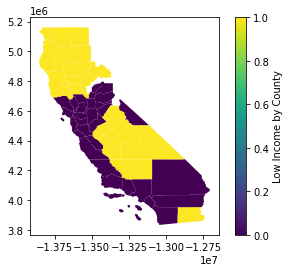

In [56]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Low Income',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Low Income by County",
                        'orientation': "vertical"})

This plot shows the actual median income of each county across California.

<AxesSubplot:>

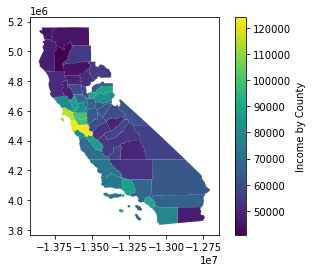

In [57]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Income',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Income by County",
                        'orientation': "vertical"})


### Median AQI Level in Each County in California

We used geopandas to show the median AQI levels across California.

<AxesSubplot:>

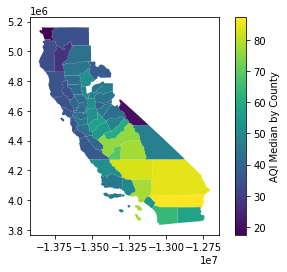

In [53]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Overall_AQI_Median',
            ax=ax,
            legend=True,
            legend_kwds={'label': "AQI Median by County",
                        'orientation': "vertical"})


We used a bar chart to highlight each county’s average air quality over the 11 year span of 2010 to 2020. The red bars represent the counties in which the median income is below our calculated income threshold, and the blue bars represent the counties that are above this threshold. As can be seen, the bar chart shows great variety between the median AQI level of the counties. It can also be seen from the bar chart that there does not appear to be a distinct trend or difference between the two income levels in terms of the median AQI level.

Text(0.5, 1.0, 'Average AQI Median from 2010-2020 for Each County in California')

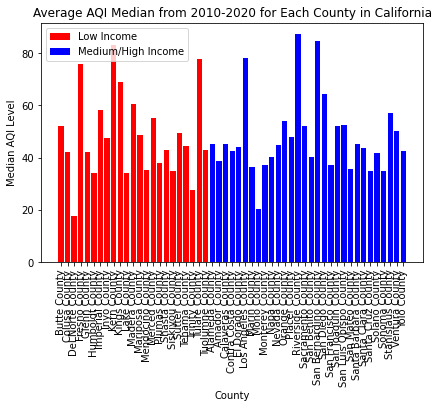

In [55]:
#bar1 = sns.barplot(x='County',  y='Overall_AQI_Median', data=all_data, color='darkblue')
plt.xticks(rotation=90)
plt.tight_layout()

mask1 = all_data['Low Income'] == True
mask2 = all_data['Low Income'] == False

plt.bar(all_data['County'][mask1], all_data['Overall_AQI_Median'][mask1], color = 'red')
plt.bar(all_data['County'][mask2], all_data['Overall_AQI_Median'][mask2], color = 'blue')
plt.legend(['Low Income', 'Medium/High Income'])

plt.xlabel("County")
plt.ylabel("Median AQI Level")
plt.title("Average AQI Median from 2010-2020 for Each County in California")

In [62]:
low_income_data = all_data[all_data['Low Income'] == True]
low_income_aqi_mean = low_income_data['Overall_AQI_Median'].mean()
print(low_income_aqi_mean)

non_low_income_data = all_data[all_data['Low Income'] == False]
non_low_income_aqi_mean = non_low_income_data['Overall_AQI_Median'].mean()
print(non_low_income_aqi_mean)

48.34782608695652
47.654545454545456


Above we calculated the mean of the overall AQI median for the counties with low median income and the mean of the overall AQI median for the counties with non low income. The low income AQI mean is 48.35 and the non low income AQI mean is 47.65 which is not a significant difference in mean overall AQI median.

This scatterplot shows the relationship between median AQI level and median income.

Text(0.5, 1.0, 'AQI Median Across Different County Incomes')

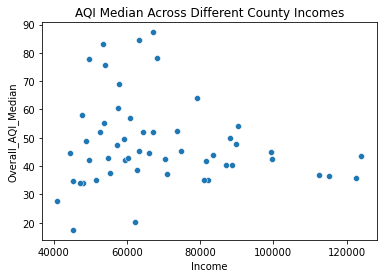

In [31]:
sns.scatterplot(x='Income',y='Overall_AQI_Median',data=all_data)
plt.title('AQI Median Across Different County Incomes')

We now want to look at how income can impact AQI levels. 

In [33]:
outcome_aqi_median, predictors_aqi_median = patsy.dmatrices("Overall_AQI_Median ~ Income", all_data)
model_aqi_median = sm.OLS(outcome_aqi_median, predictors_aqi_median)

In [34]:
## fit the model
results_aqi_median = model_aqi_median.fit()

## look at the results
print(results_aqi_median.summary())

                            OLS Regression Results                            
Dep. Variable:     Overall_AQI_Median   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8723
Date:                Mon, 07 Jun 2021   Prob (F-statistic):              0.355
Time:                        20:41:50   Log-Likelihood:                -218.85
No. Observations:                  53   AIC:                             441.7
Df Residuals:                      51   BIC:                             445.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.5687      7.387      7.387      0.0

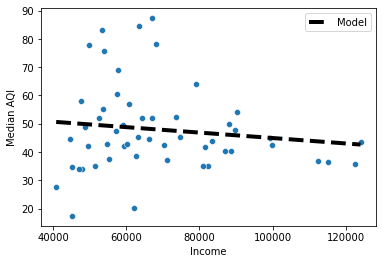

In [35]:
# Plot the orginal data (as before)
sns.scatterplot(x='Income',y='Overall_AQI_Median',data=all_data)

# Generate and plot the model fit line
xs = np.arange(all_data['Income'].min(), all_data['Income'].max())
ys = -9.599e-05  * xs + 54.5687
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Income')
plt.ylabel('Median AQI')
plt.legend();

According to our analysis, with a p-value of 0.355 we fail to reject the null hypothesis and conclude that there is no significant relationship between the income of a county and the median AQI level of that county.

### Number of Days With a Good AQI Level

We used geopandas to show the average number of days with a good AQI level across the counties in California.

<AxesSubplot:>

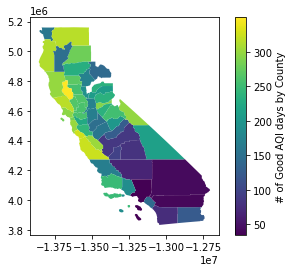

In [54]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Overall_Good',
            ax=ax,
            legend=True,
            legend_kwds={'label': "# of Good AQI days by County",
                        'orientation': "vertical"})


We used a bar chart to highlight each county’s average number of days with good AQI levels over the 11 year span of 2010 to 2020. The red bars represent the counties in which the median income is below our calculated income threshold, and the blue bars represent the counties that are above this threshold. As can be seen, the bar chart shows great variety between the Median number of days with a good AQI Level for the counties. It can also be seen from the bar chart that there does not appear to be a distinct trend or difference between the two income levels in terms of the median AQI level.

Text(0.5, 1.0, 'Average Number of Days with a Good AQI Level from 2010-2020 for Each County in California')

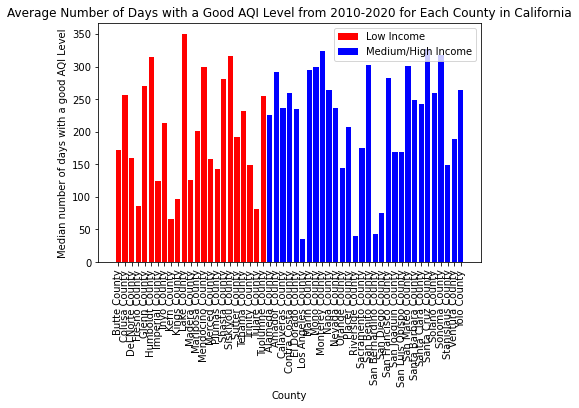

In [54]:
plt.xticks(rotation=90)
plt.tight_layout()

mask1 = all_data['Low Income'] == True
mask2 = all_data['Low Income'] == False

plt.bar(all_data['County'][mask1], all_data['Overall_Good'][mask1], color = 'red')
plt.bar(all_data['County'][mask2], all_data['Overall_Good'][mask2], color = 'blue')
plt.legend(['Low Income', 'Medium/High Income'])

plt.xlabel("County")
plt.ylabel("Median number of days with a good AQI Level")
plt.title("Average Number of Days with a Good AQI Level from 2010-2020 for Each County in California")

In [63]:
low_income_good_mean = low_income_data['Overall_Good'].mean()
print(low_income_good_mean)

non_low_income_good_mean = non_low_income_data['Overall_Good'].mean()
print(non_low_income_good_mean)

197.5177865612648
220.13030303030308


Above we calculated the mean of the overall good days for the counties with low median income and the mean of the overall good days for the counties with non low income. The low income overall good days mean is 197.52 and the non low income overall good days mean is 220.13. While the mean for the low income is lower than the mean for the non low income a conclusion cannot be made from this alone.

This scatter plot shows the number of overall good air quality days and the income with each dot on the graph being a county in california. This will help us represent the relationship between income and air quality to highlight how income may be correlated with good air quality.

<AxesSubplot:xlabel='Income', ylabel='Overall_Good'>

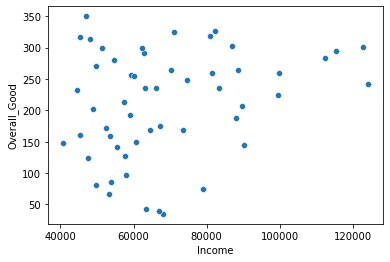

In [36]:
sns.scatterplot(x='Income',y='Overall_Good',data=all_data)

We want to look at how income (predictor) can impact the number of days with good AQI value (outcome).

In [30]:
outcome_good, predictors_good = patsy.dmatrices("Overall_Good ~ Income", all_data)
model_good = sm.OLS(outcome_good, predictors_good)

In [31]:
## fit the model
results_good = model_good.fit()

## look at the results
print(results_good.summary())

                            OLS Regression Results                            
Dep. Variable:           Overall_Good   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.630
Date:                Wed, 02 Jun 2021   Prob (F-statistic):             0.0624
Time:                        14:00:40   Log-Likelihood:                -308.23
No. Observations:                  53   AIC:                             620.5
Df Residuals:                      51   BIC:                             624.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    137.4671     39.887      3.446      0.0

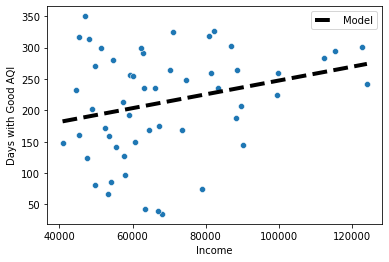

In [39]:
# Plot the orginal data (as before)
sns.scatterplot(x='Income',y='Overall_Good',data=all_data)

# Generate and plot the model fit line
xs = np.arange(all_data['Income'].min(), all_data['Income'].max())
ys = 0.0011 * xs + 137.4671
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Income')
plt.ylabel('Days with Good AQI')
plt.legend();

According to our analysis, with a p-value of 0.062, we fail to reject the null hypothesis and conclude that the income of a county is not significantly correlated with the number of days with a good AQI level in the county. However, the p-value is quite low and further analysis may be needed to make this conclusion.

### Number of Days With an Unhealthy AQI Level

We used geopandas to show the average number of days with an unhealthy AQI level across the counties in California.

<AxesSubplot:>

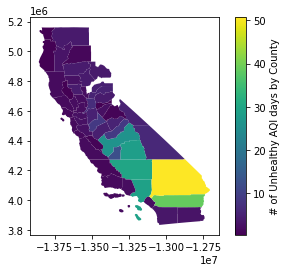

In [55]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='Overall_Unhealthy',
            ax=ax,
            legend=True,
            legend_kwds={'label': "# of Unhealthy AQI days by County",
                        'orientation': "vertical"})


We used a bar chart to highlight each county’s average number of days with unhealthy AQI levels over the 11 year span of 2010 to 2020. The red bars represent the counties in which the median income is below our calculated income threshold, and the blue bars represent the counties that are above this threshold. As can be seen, the bar chart shows great variety between the Median number of days with an unhealthy AQI Level for the counties. It can also be seen from the bar chart that there does not appear to be a distinct trend or difference between the two income levels in terms of the AQI level.

Text(0.5, 1.0, 'Average Number of Days with an Unhealthy AQI Level from 2010-2020 for Each County in California')

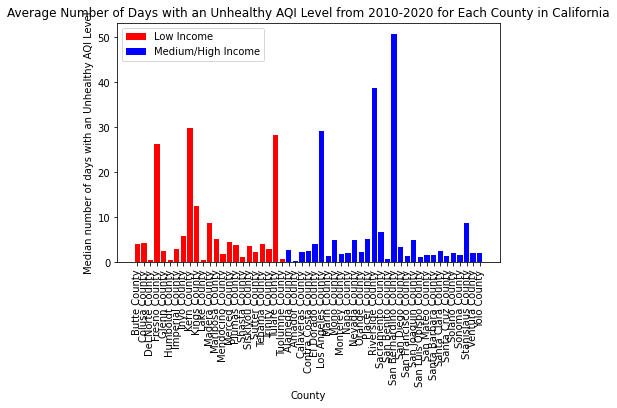

In [57]:
plt.xticks(rotation=90)
plt.tight_layout()

mask1 = all_data['Low Income'] == True
mask2 = all_data['Low Income'] == False

plt.bar(all_data['County'][mask1], all_data['Overall_Unhealthy'][mask1], color = 'red')
plt.bar(all_data['County'][mask2], all_data['Overall_Unhealthy'][mask2], color = 'blue')
plt.legend(['Low Income', 'Medium/High Income'])

plt.xlabel("County")
plt.ylabel("Median number of days with an Unhealthy AQI Level")
plt.title("Average Number of Days with an Unhealthy AQI Level from 2010-2020 for Each County in California")

In [64]:
low_income_unhealthy_mean = low_income_data['Overall_Unhealthy'].mean()
print(low_income_unhealthy_mean)

non_low_income_unhealthy_mean = non_low_income_data['Overall_Unhealthy'].mean()
print(non_low_income_unhealthy_mean)

6.782608695652175
6.46060606060606


Above we calculated the mean of the overall unhealthy days for the counties with low median income and the mean of the overall good days for the counties with non low income. The low income overall good days mean is 6.78 and the non low income overall good days mean is 6.46. This is not a significant difference in the mean of the overall unhealthy days.

This scatterplot shows the number of unhealthy air quality days in a year. Each instance corresponds to an income in incrementing order.

<AxesSubplot:xlabel='Income', ylabel='Overall_Unhealthy'>

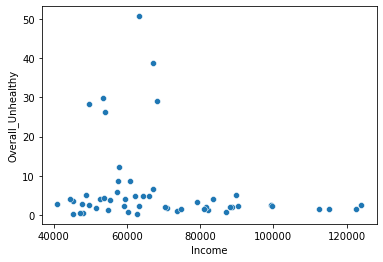

In [38]:
sns.scatterplot(x='Income',y='Overall_Unhealthy',data=all_data)

We want to look at how income can impact the number of days with an unhealthy AQI value.

In [41]:
outcome_Unhealthy, predictors_Unhealthy = patsy.dmatrices("Overall_Unhealthy ~ Income", all_data)
model_Unhealthy = sm.OLS(outcome_Unhealthy, predictors_Unhealthy)

In [43]:
## fit the model
results_Unhealthy = model_Unhealthy.fit()

## look at the results
print(results_Unhealthy.summary())

                            OLS Regression Results                            
Dep. Variable:      Overall_Unhealthy   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.880
Date:                Mon, 07 Jun 2021   Prob (F-statistic):              0.176
Time:                        20:58:15   Log-Likelihood:                -198.36
No. Observations:                  53   AIC:                             400.7
Df Residuals:                      51   BIC:                             404.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1949      5.018      2.630      0.0

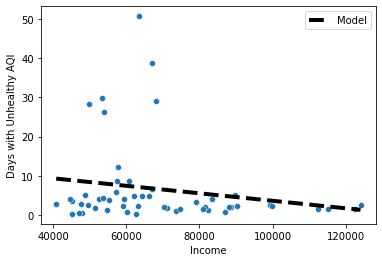

In [45]:
# Plot the orginal data (as before)
sns.scatterplot(x='Income',y='Overall_Unhealthy',data=all_data)

# Generate and plot the model fit line
xs = np.arange(all_data['Income'].min(), all_data['Income'].max())
ys = -9.572e-05  * xs + 13.1949
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Income')
plt.ylabel('Days with Unhealthy AQI')
plt.legend();

According to our analysis, with a p-value of 0.176, we fail to reject the null hypothesis and conclude that the income of a county is not significantly correlated with the number of days with an unhealthy AQI level.

### Number of Days With a Moderate AQI Level

We used a bar chart to highlight each county’s average number of days with moderate AQI levels over the 11 year span of 2010 to 2020. The red bars represent the counties in which the median income is below our calculated income threshold, and the blue bars represent the counties that are above this threshold. As can be seen, the bar chart shows great variety between the Median number of days with an moderate AQI Level for the counties. It can also be seen from the bar chart that there does not appear to be a distinct trend or difference between the two income levels in terms of the AQI level.

Text(0.5, 1.0, 'Average Number of Days with a Moderate AQI Level from 2010-2020 for Each County in California')

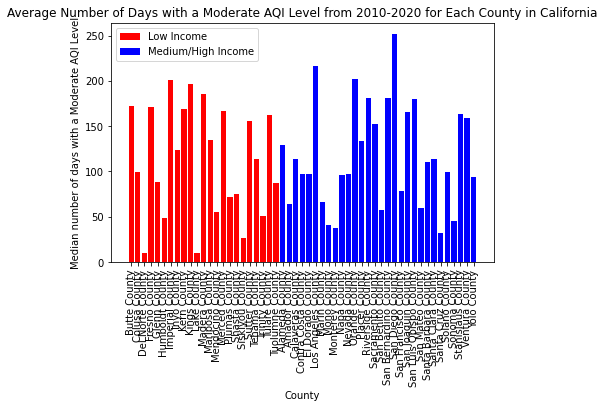

In [58]:
plt.xticks(rotation=90)
plt.tight_layout()

mask1 = all_data['Low Income'] == True
mask2 = all_data['Low Income'] == False

plt.bar(all_data['County'][mask1], all_data['Overall_Moderate'][mask1], color = 'red')
plt.bar(all_data['County'][mask2], all_data['Overall_Moderate'][mask2], color = 'blue')
plt.legend(['Low Income', 'Medium/High Income'])

plt.xlabel("County")
plt.ylabel("Median number of days with a Moderate AQI Level")
plt.title("Average Number of Days with a Moderate AQI Level from 2010-2020 for Each County in California")

In [65]:
low_income_moderate_mean = low_income_data['Overall_Moderate'].mean()
print(low_income_moderate_mean)

non_low_income_moderate_mean = non_low_income_data['Overall_Moderate'].mean()
print(non_low_income_moderate_mean)

111.92094861660078
117.1969696969697


Above we calculated the mean of the overall moderate days for the counties with low median income and the mean of the overall good days for the counties with non low income. The low income overall good days mean is 111.92 and the non low income overall good days mean is 117.2. This is not a significant difference in the mean of the overall unhealthy days.

This scatterplot shows the number of moderate air quality days in a year for each county in california in relationship to it's income.

<AxesSubplot:xlabel='Income', ylabel='Overall_Unhealthy'>

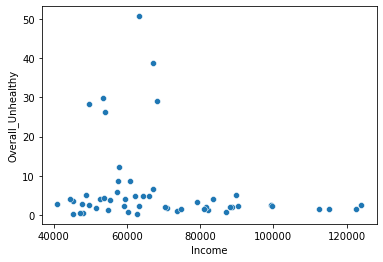

In [38]:
sns.scatterplot(x='Income',y='Overall_Moderate',data=all_data)

We want to look at how income can impact the number of days with a moderate AQI value.

In [46]:
outcome_Moderate, predictors_Moderate = patsy.dmatrices("Overall_Moderate ~ Income", all_data)
model_Moderate = sm.OLS(outcome_Moderate, predictors_Moderate)

In [47]:
## fit the model
results_Moderate = model_Moderate.fit()

## look at the results
print(results_Moderate.summary())

                            OLS Regression Results                            
Dep. Variable:       Overall_Moderate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.06103
Date:                Mon, 07 Jun 2021   Prob (F-statistic):              0.806
Time:                        21:02:45   Log-Likelihood:                -290.45
No. Observations:                  53   AIC:                             584.9
Df Residuals:                      51   BIC:                             588.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.6603     28.518      4.266      0.0

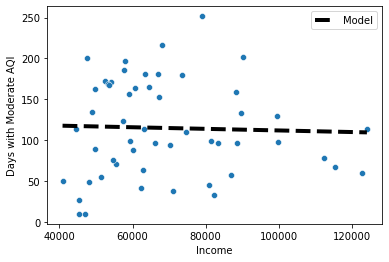

In [48]:
# Plot the orginal data (as before)
sns.scatterplot(x='Income',y='Overall_Moderate',data=all_data)

# Generate and plot the model fit line
xs = np.arange(all_data['Income'].min(), all_data['Income'].max())
ys = -9.801e-05  * xs + 121.6603
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Income')
plt.ylabel('Days with Moderate AQI')
plt.legend();

According to our analysis, with a p-value of 0.806, we fail to reject the null hypothesis and conclude that the income of a county is not significantly correlated with the number of days with a moderate AQI level.

### General Trend of Air Quality from 2010-2020

#### General Trend of Average Median AQI Level from 2010-2020

In [66]:
yearGrouped = aqi_data.groupby("Year")
aqiMedian_by_year = yearGrouped['AQI Median'].mean().to_frame(name = 'Overall_AQI_Median').reset_index()
aqiGood_by_year = yearGrouped['Good'].mean().to_frame(name = 'Overall_Good').reset_index()
aqiUnhealthy_by_year = yearGrouped['Unhealthy'].mean().to_frame(name = 'Overall_Unhealthy').reset_index()
aqiModerate_by_year = yearGrouped['Moderate'].mean().to_frame(name = 'Overall_Moderate').reset_index()
aqi_by_year = pd.merge(aqiMedian_by_year, aqiGood_by_year)
aqi_by_year = pd.merge(aqi_by_year, aqiUnhealthy_by_year)
aqi_by_year = pd.merge(aqi_by_year, aqiModerate_by_year)
#aqi_by_county['Overall_Bad'] = 365 - aqi_by_county['Overall_Good'] 
aqi_by_year.head()

,Year,Overall_AQI_Median,Overall_Good,Overall_Unhealthy,Overall_Moderate
0,2010,45.320755,221.849057,5.320755,102.339623
1,2011,49.556604,196.735849,7.150943,122.584906
2,2012,48.801887,205.792453,6.962264,115.886792
3,2013,49.679245,194.113208,5.000000,129.509434
4,2014,49.377358,196.566038,5.490566,123.283019


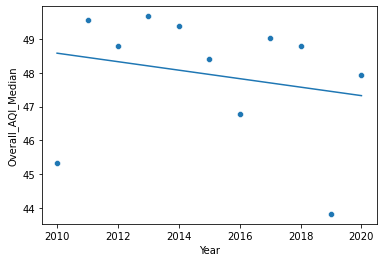

In [69]:
sns.scatterplot(x='Year',y='Overall_AQI_Median',data=aqi_by_year)
m, b = np.polyfit(aqi_by_year['Year'], aqi_by_year['Overall_AQI_Median'], 1)
plt.plot(aqi_by_year['Year'], m*aqi_by_year['Year'] + b)

It is important to note that in general, the median AQI level across all the counties in CA has gotten worse, meaning the air quality has gotten worse. This directly reflects the trend of climate change getting worse. It is also important to keep in mind that there was a pandemic in 2020. The air quality has a massive dip in 2019 to about 44 on average, and then jumps back up to about 48 on average in 2020.

#### General Trend of Average Number of Days with a Good AQI Level from 2010-2020

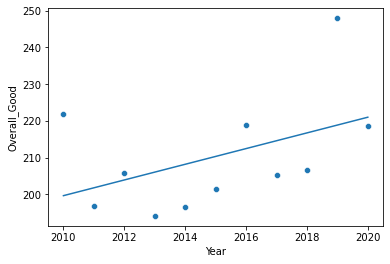

In [70]:
sns.scatterplot(x='Year',y='Overall_Good',data=aqi_by_year)
m, b = np.polyfit(aqi_by_year['Year'], aqi_by_year['Overall_Good'], 1)
plt.plot(aqi_by_year['Year'], m*aqi_by_year['Year'] + b)

It is surprising that although the median AQI index across California has been slightly decreasing since 2010, the number of days with a good AQI level has been increasing. More future analysis should be done to explain this phenomena. Below we can see that bad days are also increasing, so these unhealthy days must have a largely impact than the good leveled days. 

#### General Trend of Average Number of Days with an Unhealthy AQI Level from 2010-2020

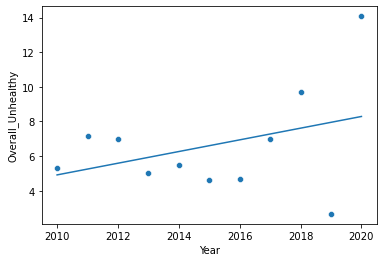

In [72]:
sns.scatterplot(x='Year',y='Overall_Unhealthy',data=aqi_by_year)
m, b = np.polyfit(aqi_by_year['Year'], aqi_by_year['Overall_Unhealthy'], 1)
plt.plot(aqi_by_year['Year'], m*aqi_by_year['Year'] + b)

Interestingly enough, the number of days with bad AQI levels is increasing along side the number of days with a bad AQI level. The upward trend in both the number of days with an unhealthy AQI level and the number of days with a good AQI level is reflected below in the decreasing number of days with a moderate AQI level.

#### General Trend of Average Number of Days with a Moderate AQI Level from 2010-2020

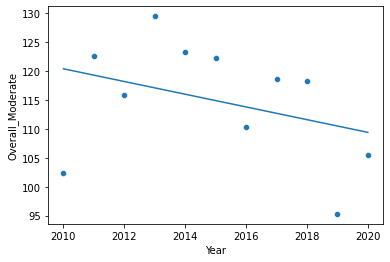

In [73]:
sns.scatterplot(x='Year',y='Overall_Moderate',data=aqi_by_year)
m, b = np.polyfit(aqi_by_year['Year'], aqi_by_year['Overall_Moderate'], 1)
plt.plot(aqi_by_year['Year'], m*aqi_by_year['Year'] + b)

Overall, the number of days with a moderate AQI level across California is decreasing. This is not surprising after looking at the increasing trend of days with a good or an unhealthy AQI level. 

# Ethics & Privacy

Overall, the datasets we used was publicly available and contained no sensitive personal information about the participants. The datasets provided was from official US government websites. 

Regarding our datasets, there were a few concerns about the bias and skew of the datasets.

First off, there were concerns of location bias due to the fact that our analysis focused on counties as opposed to cities/ towns. 

We also had concerns of bias from our county income dataset due to the fact that the dataset contained the median household income of counties in California; however, a single county can account for lots of cities with widely varying incomes. Not only that, but all counties in California except for one county have unincorporated areas which aren't accurately accounted for in the census. Aside from that, only 53 out of the 58 counties in California were included in our analysis due to gaps and inconsistencies of information within the corresponding datasets.

With that being said, we predict we’d be able to see clearer trends between median household income for cities and their air quality index if we had data that contained the median household income for cities in California and the AQI for those cities.

Not only is there a bias for the state we chose but also a location bias for the counties of California we analyzed. And since our data is specific to California, we do not believe that we can generalize our findings to the rest of the United States.

Lastly, there were concerns of AQI bias due to possible cross-pollution which could interfere with true AQI data and make it much more complicated to see any true relationship with the income of these counties and their AQI. The article states:

#### “Winds flowing down from the South Coast air basin and Los Angeles can also play a role in significantly elevating San Diego air pollution levels. Los Angeles ozone is the worst in the nation. State studies identify transported air pollution as an additional challenge for San Diego in meeting federal ozone attainment levels.”
More information can be found via this link: 
https://www.iqair.com/us/usa/california/san-diego


Due to the fact that there was no significant correlation between our datasets, there may be an ethical concern that our results could be interpreted to show that low income communities and people with lower socioeconomic statuses are not disproportionately affected by climate change. We therefore would like to make it clear that do not provide any clear interpretation of how climate change is affecting people in low income communities.

# Conclusion & Discussion

### Conclusion from analysis

#### Conclusions About Air Quality in Low Income Communities

In conclusion, we did not find any significant relationship between Air Quality measured by AQI level and the median income of a county in California. More specifically, we found no significant relationship between median AQI level and income, number of days with a good AQI level and income, number of days with an unhealthy AQI level and income, and number of days with a moderate AQI level and income. The closest we came to a significant finding was the relationship between the number of days with a good AQI level and median income of a community, which indicates that further research should be done and will be discussed in our further research section. This in no way means that low income communities are disproportionately affected by climate change, since we were only succesfully able to look at the relationship between air quality and income. Just because there was no significant correlation regarding air quality doesn't mean these communities are more severly impacted by the effects of climate change such as natural disasters. 

#### Conclusions About General Trends

In general, the median AQI level across all counties in California has been decreasing since 2010. This indicates that air quality has been worsening. It is important to consider confounds such as the pandemic in 2020 which could slightly alter the trend, making it less intense since the air quality was probably better while everybody was indoors. Air quality could have been getting exponentialoy worse, and then gone back up since less people were driving and impacting the environment while quarantining.

Additionally, the number of days with a good AQI level and the number of days with an unhealthy AQI level across California have both been increasing since 2010. In turn, the number of days with a moderate AQI level across California has been decreasing since 2010. 

These trends lead to questions driving future research suggested below.

### Limitations

- We only looked at the relationship between the median income of a county and the reported AQI (air quality index). We chose to only look at this aspect of climate change because of the limited choices we had for data. 
- We were also only able to look at 53 counties in California, and there can be much disparity within the communities within each county. 
- It is difficult to determine the true impact of climate change on low income communities through air quality alone.
- It is difficult to find a relationship between county incomes and AQI due to potential cross-pollution from neighboring regions.

### Future Research

- There could be other ways that climate change affects low-income communities different form higher income communities. For example, it could be more difficult for these low income communities to recover from any natural disasters caused by climate change.
- It might be helpful to look more specifically at neighborhoods in a county because of the disparity that can be in place in a city.
- It might also be helpful to do a separate analysis on how other factors such as popultion distribution or population density may have a larger correlation to climate change
- One question we have from our findings is how does a decreasing AQI level and the increasing number of days with an unhealthy AQI level disproportionaly affect low income communities? In other words, could a slight downward trend in air quality could disproportionaly affect low income communities in an exponential way?
- Another question that arose was what is causing the increasing number of unhealthy days? And how are these days disproportionately affecting low income communities? 
- What is causing BOTH days with good AQI levels and days with unhealhy AQI levels to increase?

Looking at the potential confounds in the general trends and their impact on low income communities could give greater insight into the disparity within the effects of climate change in communities with different incomes.

# Team Contributions

Cristian Jarquin: Presentation, Geopandas, EDA, Dataset Git Upload.

Vanessa Komar: Sources, Data Cleaning, Data Analysis, Ethics & Privacy, Future Research. 

Ivan Cervantes Palomino: Sources/References, Background & Prior Work, Ethics & Privacy, EDA, Limitations.

Bridget Phimmasone: Overview, Ethics & Privacy, Video Editing.

Sierra Rose: Sources/References, Data Cleaning, EDA, Data Analysis, Conclusion/Discussion/Limitations.